# Regression and Classification

In [16]:
import torch
import torch.nn as nn

torch.manual_seed(42)
model = nn.Linear(10, 1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.2418,  0.2625, -0.0741,  0.2905, -0.0693,  0.0638, -0.1540,  0.1857,
          0.2788, -0.2320]], requires_grad=True)
Parameter containing:
tensor([0.2749], requires_grad=True)


In [17]:
x = torch.ones(10)
model(x)

tensor([1.0686], grad_fn=<ViewBackward0>)

In [18]:
x = torch.zeros(10)
model(x)

tensor([0.2749], grad_fn=<ViewBackward0>)

In [23]:
class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim: int, output_dim: int):
        super().__init__()
        self.fc = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # don't apply this transformation inside the network in practice
        # it is numerically unstable
        return nn.functional.sigmoid(self.fc(x))
    
model = LinearClassifier(10, 1)
x = torch.zeros(10)
model(x)

tensor([0.5228], grad_fn=<SigmoidBackward0>)

In [28]:
x = torch.rand(5, 10)
model(x)

tensor([[0.5376],
        [0.3980],
        [0.5862],
        [0.4237],
        [0.4731]], grad_fn=<SigmoidBackward0>)

## Multiclass Classification

In [29]:
# implement the softmax function
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

x = torch.rand(5)
print(x)
print(softmax(x))

tensor([0.1585, 0.0758, 0.2247, 0.0624, 0.1816])
tensor([0.2032, 0.1871, 0.2171, 0.1846, 0.2080])


In [41]:
class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim: int, n_classes: int):
        super().__init__()
        self.fc = torch.nn.Linear(input_dim, n_classes)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # don't apply this transformation inside the network in practice
        # it is numerically unstable
        return nn.functional.softmax(self.fc(x), dim=-1)
    
model = LinearClassifier(10, 4)
x = torch.rand(10)
model(x)

tensor([0.2098, 0.1957, 0.4139, 0.1806], grad_fn=<SoftmaxBackward0>)

In [42]:
x = torch.rand(5, 10)
model(x)

tensor([[0.1615, 0.1564, 0.4838, 0.1983],
        [0.2201, 0.2263, 0.3879, 0.1658],
        [0.2161, 0.1836, 0.4274, 0.1729],
        [0.1761, 0.1307, 0.4862, 0.2070],
        [0.1830, 0.1822, 0.4558, 0.1789]], grad_fn=<SoftmaxBackward0>)

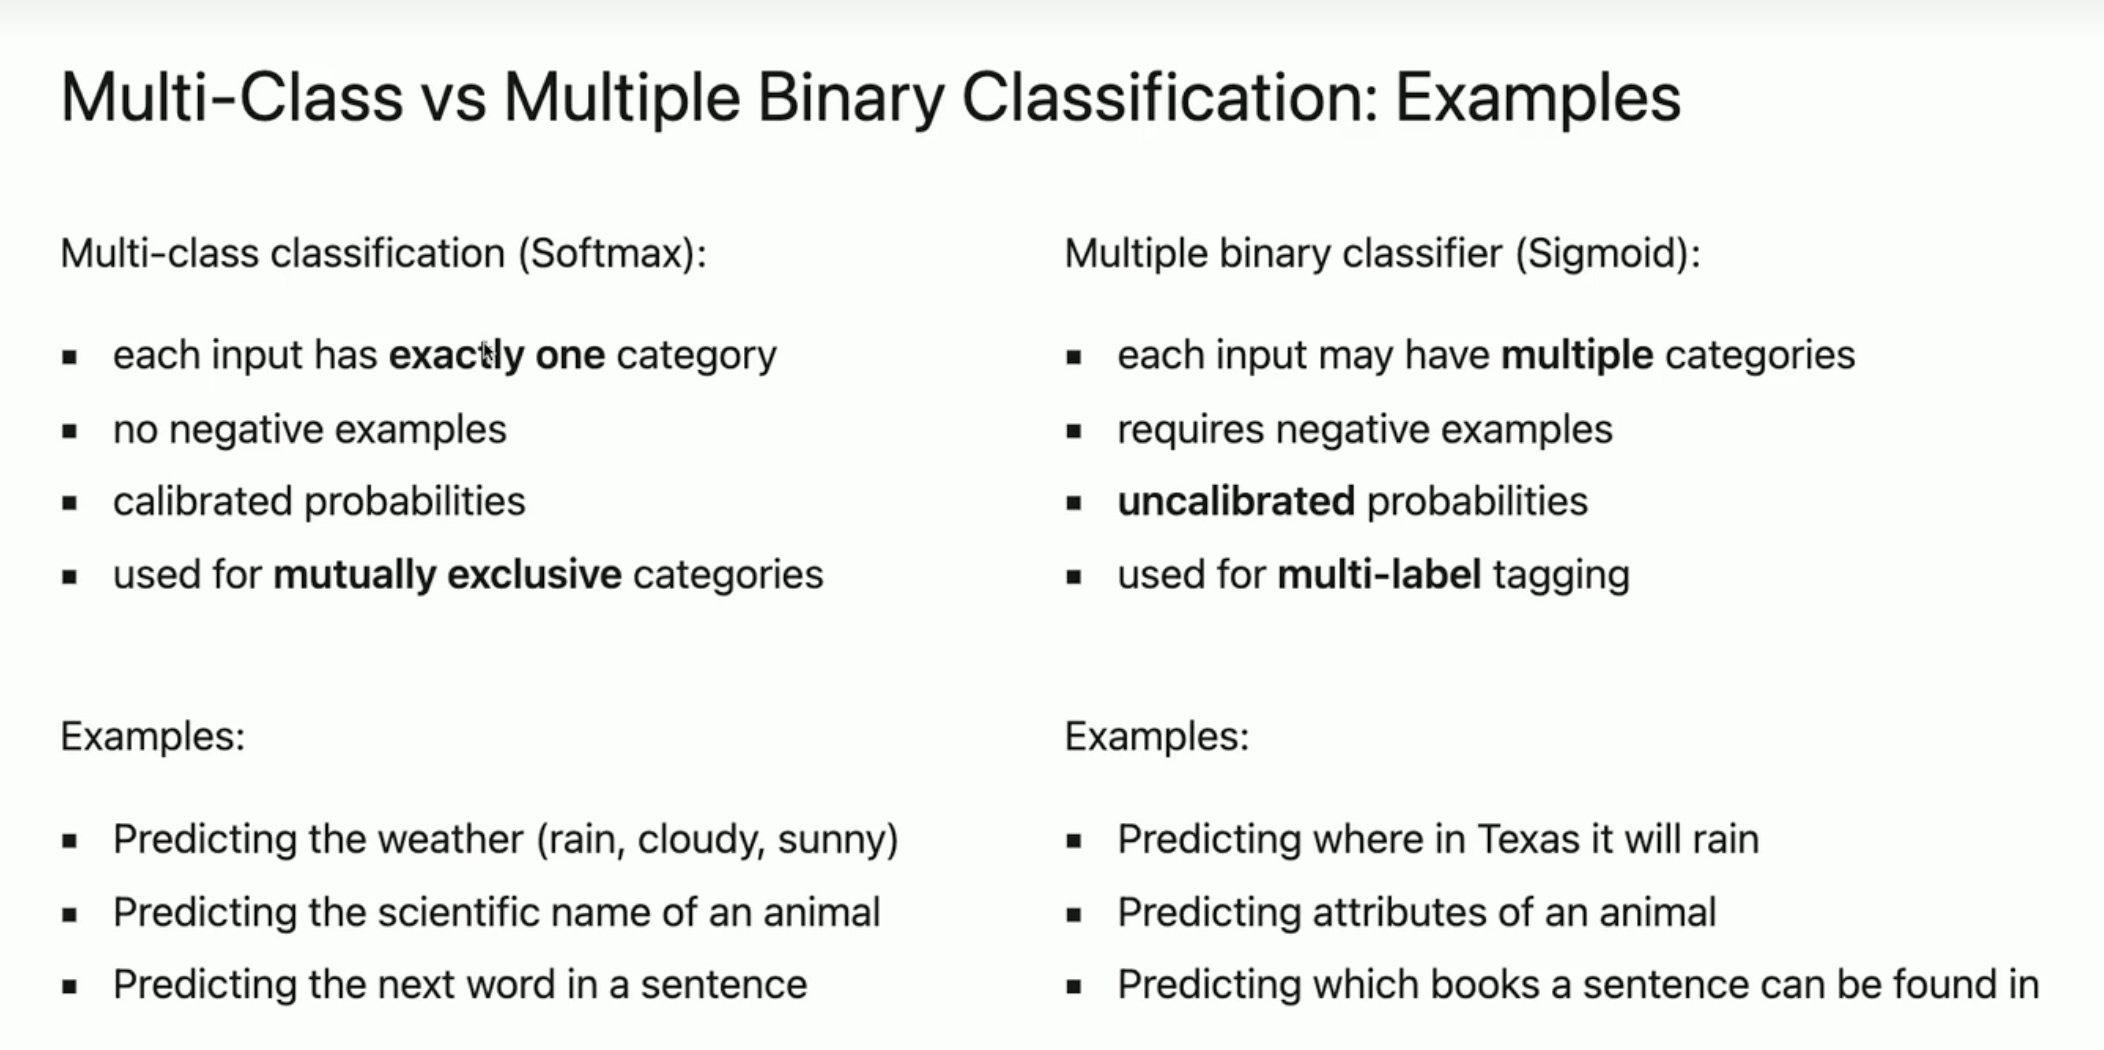